Here in this cell we are importing some important libraries for data prepration, data processing and for machine learning models

In [2]:
# Importing Libraries 
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

Here, in the below cell we are Reading and displaying the data, data info, and summary statistics.

In [4]:
# Loading dataset
injury_record = pd.read_csv('InjuryRecord.csv')
injury_record.head()

,PlayerKey,GameID,PlayKey,BodyPart,Surface,DM_M1,DM_M7,DM_M28,DM_M42
0,39873,39873-4,39873-4-32,Knee,Synthetic,1,1,1,1
1,46074,46074-7,46074-7-26,Knee,Natural,1,1,0,0
2,36557,36557-1,36557-1-70,Ankle,Synthetic,1,1,1,1
3,46646,46646-3,46646-3-30,Ankle,Natural,1,0,0,0
4,43532,43532-5,43532-5-69,Ankle,Synthetic,1,1,1,1


In [5]:
# displaying Shape of data
injury_record.shape

(105, 9)

In [6]:
# Displaying missing values by each column
print(injury_record.isnull().sum())

PlayerKey     0
GameID        0
PlayKey      28
BodyPart      0
Surface       0
DM_M1         0
DM_M7         0
DM_M28        0
DM_M42        0
dtype: int64


In [7]:
# Loading other play_list data
play_list = pd.read_csv('PlayList.csv')
play_list.head()

,PlayerKey,GameID,PlayKey,RosterPosition,PlayerDay,PlayerGame,StadiumType,FieldType,Temperature,Weather,PlayType,PlayerGamePlay,Position,PositionGroup
0,26624,26624-1,26624-1-1,Quarterback,1,1,Outdoor,Synthetic,63,Clear and warm,Pass,1,QB,QB
1,26624,26624-1,26624-1-2,Quarterback,1,1,Outdoor,Synthetic,63,Clear and warm,Pass,2,QB,QB
2,26624,26624-1,26624-1-3,Quarterback,1,1,Outdoor,Synthetic,63,Clear and warm,Rush,3,QB,QB
3,26624,26624-1,26624-1-4,Quarterback,1,1,Outdoor,Synthetic,63,Clear and warm,Rush,4,QB,QB
4,26624,26624-1,26624-1-5,Quarterback,1,1,Outdoor,Synthetic,63,Clear and warm,Pass,5,QB,QB


In [8]:
# Merging both datasets( injuryRecords and Play_list)
df = pd.merge(injury_record, play_list, on='GameID', how='left').drop_duplicates(subset=['GameID'])
df.head()

,PlayerKey_x,GameID,PlayKey_x,BodyPart,Surface,DM_M1,DM_M7,DM_M28,DM_M42,PlayerKey_y,...,PlayerDay,PlayerGame,StadiumType,FieldType,Temperature,Weather,PlayType,PlayerGamePlay,Position,PositionGroup
0,39873,39873-4,39873-4-32,Knee,Synthetic,1,1,1,1,39873,...,29,4,Indoors,Synthetic,84,Cloudy,Kickoff,1,OLB,LB
32,46074,46074-7,46074-7-26,Knee,Natural,1,1,0,0,46074,...,50,7,Open,Natural,76,Partly Cloudy,Kickoff,1,OLB,LB
58,36557,36557-1,36557-1-70,Ankle,Synthetic,1,1,1,1,36557,...,1,1,Outdoor,Synthetic,63,Clear and warm,Pass,1,SS,DB
128,46646,46646-3,46646-3-30,Ankle,Natural,1,0,0,0,46646,...,15,3,Outdoor,Natural,80,Cloudy,Kickoff,1,LB,LB
158,43532,43532-5,43532-5-69,Ankle,Synthetic,1,1,1,1,43532,...,32,5,Retractable Roof,Synthetic,89,Partly Cloudy,Rush,1,WR,WR


### Exploratory Data Analysis

### Finding the statistical Summaries

Here, we are displaying the descriptive summary of dataset by .info() method

In [24]:
# A summary of the dataframe with .info()
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 104 entries, 0 to 3381
Data columns (total 22 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   PlayerKey_x     104 non-null    int64 
 1   GameID          104 non-null    object
 2   PlayKey_x       76 non-null     object
 3   BodyPart        104 non-null    object
 4   Surface         104 non-null    object
 5   DM_M1           104 non-null    int64 
 6   DM_M7           104 non-null    int64 
 7   DM_M28          104 non-null    int64 
 8   DM_M42          104 non-null    int64 
 9   PlayerKey_y     104 non-null    int64 
 10  PlayKey_y       104 non-null    object
 11  RosterPosition  104 non-null    object
 12  PlayerDay       104 non-null    int64 
 13  PlayerGame      104 non-null    int64 
 14  StadiumType     99 non-null     object
 15  FieldType       104 non-null    object
 16  Temperature     104 non-null    int64 
 17  Weather         97 non-null     object
 18  PlayType 

Here we are displaying the Statistical summary of the numeric values, like percentile, mean, standard deviation etc.

In [25]:
#Statistical summary of the numeric values, like percentile, mean, standard deviation etc.
df.describe()

,PlayerKey_x,DM_M1,DM_M7,DM_M28,DM_M42,PlayerKey_y,PlayerDay,PlayerGame,Temperature,PlayerGamePlay
count,104.000000,104.0,104.000000,104.000000,104.000000,104.000000,104.000000,104.000000,104.000000,104.000000
mean,42235.307692,1.0,0.721154,0.355769,0.278846,42235.307692,140.750000,9.365385,-16.480769,1.096154
std,4154.006184,0.0,0.450603,0.481064,0.450603,4154.006184,166.820743,6.996612,285.395926,0.980581
min,31070.000000,1.0,0.000000,0.000000,0.000000,31070.000000,-34.000000,1.000000,-999.000000,1.000000
25%,39655.250000,1.0,0.000000,0.000000,0.000000,39655.250000,21.750000,4.000000,46.750000,1.000000
50%,43511.500000,1.0,1.000000,0.000000,0.000000,43511.500000,57.500000,8.000000,68.000000,1.000000
75%,45963.000000,1.0,1.000000,1.000000,1.000000,45963.000000,359.750000,13.000000,76.000000,1.000000
max,47813.000000,1.0,1.000000,1.000000,1.000000,47813.000000,471.000000,30.000000,89.000000,11.000000


In [9]:
#Printing the unique values of non-numerical columns
for feature in df.columns:
    if df[feature].dtype == object:
        print(str(feature) + ' : ' + str(df[feature].unique()))
        print(df[feature].value_counts())
        print("*"*100)

GameID : ['39873-4' '46074-7' '36557-1' '46646-3' '43532-5' '41145-2' '46014-10'
 '44860-5' '44806-7' '45962-8' '46331-4' '36621-13' '44492-3' '43505-2'
 '41094-1' '40474-1' '39656-2' '46587-2' '46119-3' '38364-5' '45966-4'
 '35611-7' '44434-10' '44489-11' '44511-5' '43826-7' '43518-6' '34347-5'
 '41943-1' '41209-9' '44900-7' '31070-3' '38228-1' '39956-2' '45950-8'
 '43540-3' '44440-6' '44449-6' '42406-6' '42637-3' '46430-8' '38192-8'
 '39678-2' '39850-9' '43540-7' '42600-3' '33337-2' '45099-5' '36591-9'
 '45950-6' '39653-4' '38253-10' '38214-12' '43119-12' '35648-12'
 '40051-13' '39671-12' '43229-15' '46021-1' '38259-2' '45158-3' '36572-4'
 '43490-9' '36573-14' '42456-20' '46038-30' '41113-15' '47235-7' '47382-3'
 '44421-12' '42348-23' '42398-15' '36559-12' '47220-4' '47813-8'
 '35570-15' '44482-20' '44449-28' '38876-29' '46098-17' '36607-16'
 '44542-13' '45983-18' '33474-19' '47287-4' '33337-8' '47307-10' '43672-8'
 '46316-5' '42418-19' '46394-18' '45187-9' '42448-14' '47334-8' '4613

In [27]:
# Value counts of weather Type
df['Weather'].value_counts()

Sunny                                                                               18
Partly Cloudy                                                                       16
Cloudy                                                                              14
Clear                                                                                9
Indoor                                                                               5
Rain                                                                                 4
Cold                                                                                 3
Indoors                                                                              3
Mostly cloudy                                                                        2
Cloudy, 50% change of rain                                                           2
Controlled Climate                                                                   2
Clear skies                                

Here in the below cell we are mapping the feature values and removing inconsistencies

In [10]:
# Cleaning and replacing values to related categories 
df['Weather'].replace(['Sunny','Clear','Mostly Sunny','Clear and warm','Fair','Clear Skies','Clear skies','Mostly sunny','Clear and Sunny','Sunny and clear'],['Clear','Clear','Clear','Clear','Clear','Clear','Clear','Clear','Clear','Clear'],inplace=True)
df['Weather'].replace(['Cloudy','Partly Cloudy','Cold','Mostly cloudy','Cloudy, 50% change of rain','Coudy','Party Cloudy','Clear and cold','Cloudy and Cool','Sun & clouds'],['Cloudy','Cloudy','Cloudy','Cloudy','Cloudy','Cloudy','Cloudy','Cloudy','Cloudy','Cloudy'],inplace=True)
df['Weather'].replace(['Rain','Rain shower','Light Rain','Cloudy with periods of rain, thunder possible. Winds shifting to WNW, 10-20 mph.'],['Rain','Rain','Rain','Rain'],inplace=True)
df['Weather'].replace(['Indoor','Indoors','Controlled Climate','N/A (Indoors)'],['Indoor','Indoor','Indoor','Indoor'],inplace=True)

In [11]:
# Value counts of Stadium Type
df['StadiumType'].value_counts()

Outdoor                47
Outdoors               11
Indoors                10
Indoor                  7
Retractable Roof        5
Dome                    4
Open                    3
Outddors                2
Retr. Roof - Open       2
Indoor, Open Roof       1
Domed, closed           1
Heinz Field             1
Retr. Roof-Closed       1
Indoor, Roof Closed     1
Oudoor                  1
Closed Dome             1
Retr. Roof - Closed     1
Name: StadiumType, dtype: int64

In [12]:
# Cleaning and replacing values to related categories 
df['StadiumType'].replace(['Outdoor', 'Cloudy', 'Heinz Field','Outdoor', 'Outdoor', 'Outside', 'Outdoor','Outdoor Retr Roof-Open', 'Oudoor', 'Bowl'],['Outdoor','Outdoor','Outdoor','Outdoor','Outdoor','Outdoor','Outdoor','Outdoor','Outdoor','Outdoor'],inplace=True)
df['StadiumType'].replace(['Indoors', 'Indoor', 'Indoor, Roof Closed', 'Indoor, Roof Closed','Retractable Roof', 'Retr. Roof-Closed', 'Retr. Roof - Closed', 'Retr. Roof Closed'],['Indoor_closed','Indoor_closed','Indoor_closed','Indoor_closed','Indoor_closed','Indoor_closed','Indoor_closed','Indoor_closed'],inplace=True)
df['StadiumType'].replace(['Indoor, Open Roof', 'Open', 'Retr. Roof-Open', 'Retr. Roof - Open'],['Indoor_open','Indoor_open','Indoor_open','Indoor_open'],inplace=True)
df['StadiumType'].replace(['Dome', 'Domed, closed', 'Closed Dome', 'Domed', 'Dome, closed'],['Dome_closed','Dome_closed','Dome_closed','Dome_closed','Dome_closed'],inplace=True)

In [13]:
# Displaying dataset
df.head()

,PlayerKey_x,GameID,PlayKey_x,BodyPart,Surface,DM_M1,DM_M7,DM_M28,DM_M42,PlayerKey_y,...,PlayerDay,PlayerGame,StadiumType,FieldType,Temperature,Weather,PlayType,PlayerGamePlay,Position,PositionGroup
0,39873,39873-4,39873-4-32,Knee,Synthetic,1,1,1,1,39873,...,29,4,Indoor_closed,Synthetic,84,Cloudy,Kickoff,1,OLB,LB
32,46074,46074-7,46074-7-26,Knee,Natural,1,1,0,0,46074,...,50,7,Indoor_open,Natural,76,Cloudy,Kickoff,1,OLB,LB
58,36557,36557-1,36557-1-70,Ankle,Synthetic,1,1,1,1,36557,...,1,1,Outdoor,Synthetic,63,Clear,Pass,1,SS,DB
128,46646,46646-3,46646-3-30,Ankle,Natural,1,0,0,0,46646,...,15,3,Outdoor,Natural,80,Cloudy,Kickoff,1,LB,LB
158,43532,43532-5,43532-5-69,Ankle,Synthetic,1,1,1,1,43532,...,32,5,Indoor_closed,Synthetic,89,Cloudy,Rush,1,WR,WR


<AxesSubplot: xlabel='BodyPart', ylabel='count'>

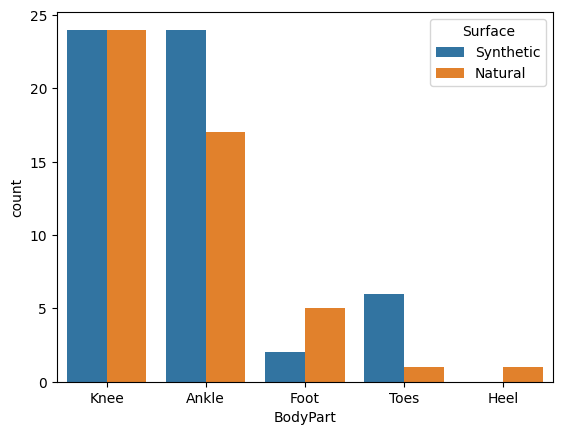

In [14]:
# Surface vs Injury Plot
sns.countplot(data=df, x='BodyPart', hue= 'Surface')

Here from above graph we can see the most of the Synthetic injuries are in knee and Ankle.

<AxesSubplot:xlabel='RosterPosition', ylabel='count'>

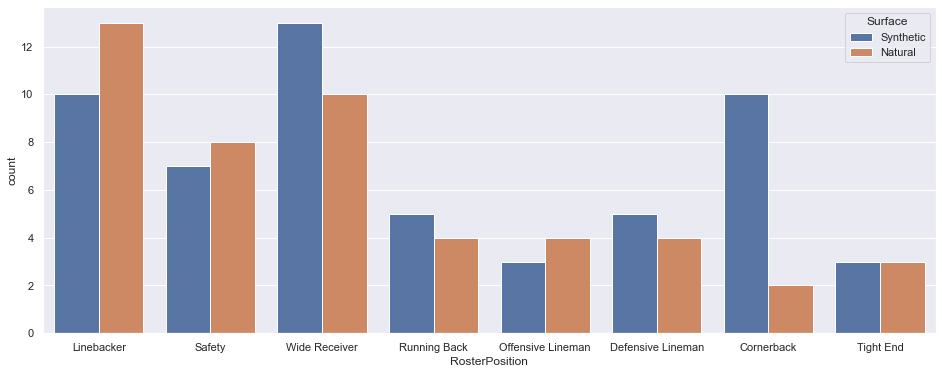

In [33]:
# Surface vs RosterPosition Plot
plt.figure(figsize=(16, 6))
sns.countplot(data=df, x='RosterPosition', hue= 'Surface')

<AxesSubplot:xlabel='Position', ylabel='count'>

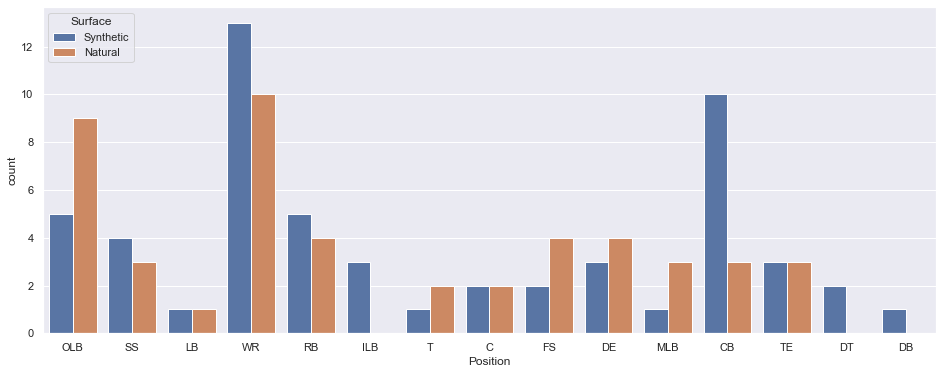

In [34]:
# Surface vs Position Plot
plt.figure(figsize=(16, 6))
sns.countplot(data=df, x='Position', hue= 'Surface')

<AxesSubplot:xlabel='PlayType', ylabel='count'>

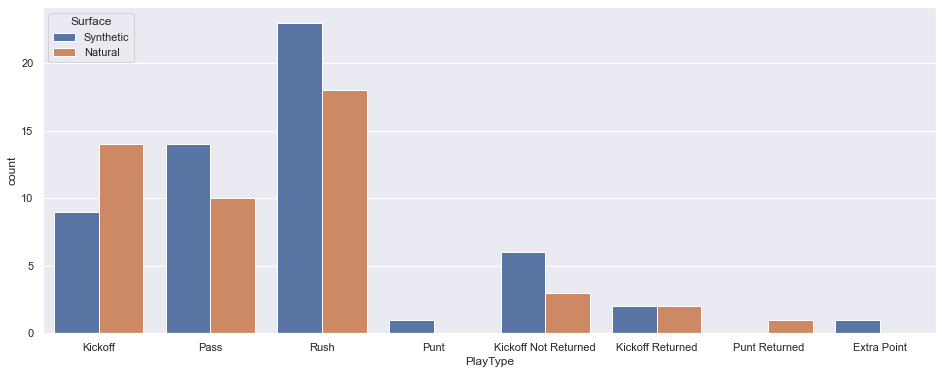

In [35]:
# Surface vs PlayType Plot
plt.figure(figsize=(16, 6))
sns.countplot(data=df, x='PlayType', hue= 'Surface')

<AxesSubplot:xlabel='DM_M7', ylabel='count'>

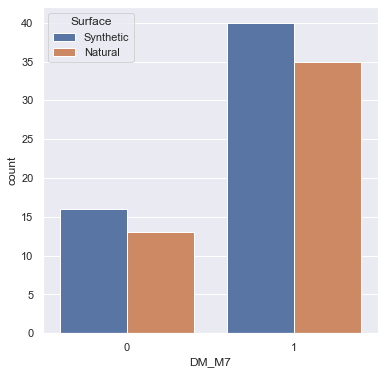

In [36]:
# Surface vs DM_M7 Plot
plt.figure(figsize=(6, 6))
sns.countplot(data=df, x='DM_M7', hue= 'Surface')

<AxesSubplot:xlabel='DM_M28', ylabel='count'>

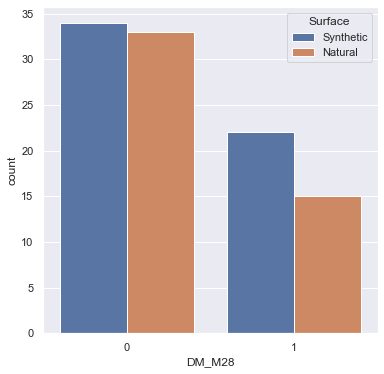

In [37]:
# Surface vs DM_M28 Plot
plt.figure(figsize=(6, 6))
sns.countplot(data=df, x='DM_M28', hue= 'Surface')

<AxesSubplot:xlabel='DM_M42', ylabel='count'>

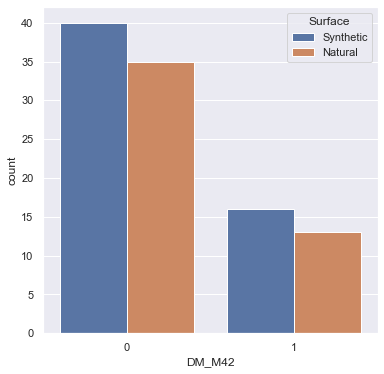

In [38]:
# Surface vs DM_M42 Plot
plt.figure(figsize=(6, 6))
sns.countplot(data=df, x='DM_M42', hue= 'Surface')

<AxesSubplot:xlabel='Weather', ylabel='count'>

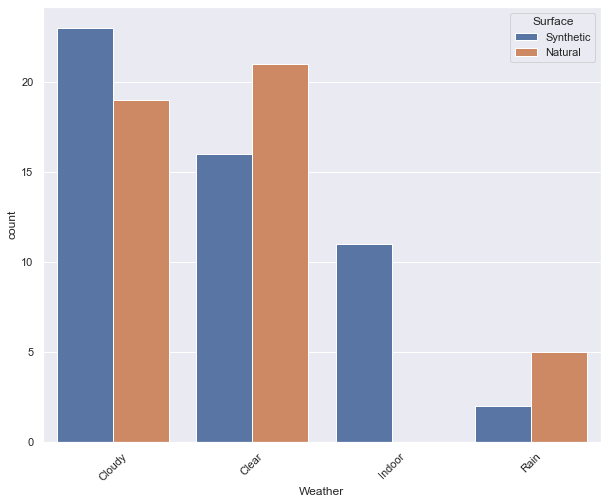

In [39]:
# Surface vs Weather Plot
plt.figure(figsize=(10, 8))
locs, labels = plt.xticks()
plt.setp(labels, rotation=45)
sns.countplot(data=df, x='Weather', hue= 'Surface')


<AxesSubplot:xlabel='StadiumType', ylabel='count'>

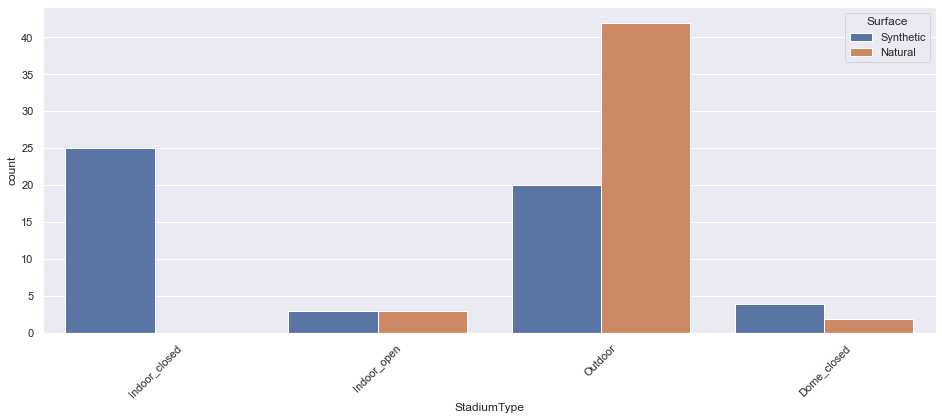

In [40]:
# Surface vs StadiumType Plot
plt.figure(figsize=(16, 6))
locs, labels = plt.xticks()
plt.setp(labels, rotation=45)
sns.countplot(data=df, x='StadiumType', hue= 'Surface')

<AxesSubplot:xlabel='Position', ylabel='count'>

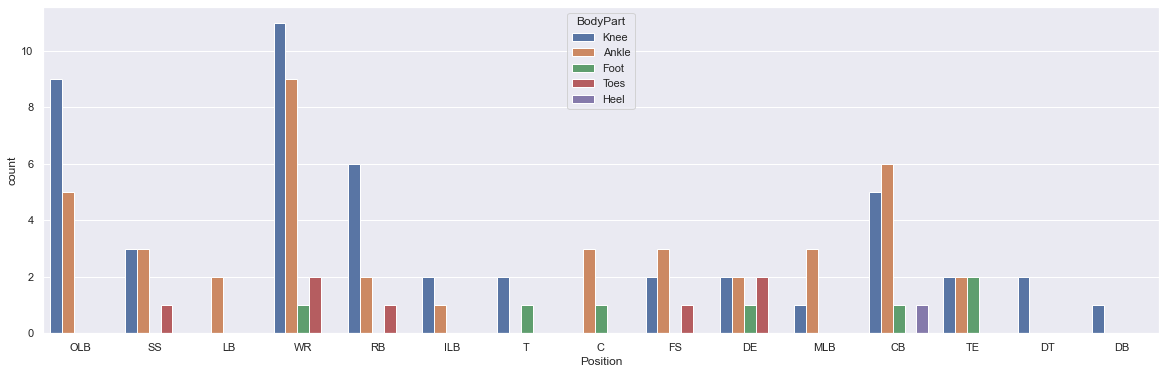

In [41]:
# BodyPart vs Position Plot
plt.figure(figsize=(20, 6))
sns.countplot(data=df, x='Position', hue= 'BodyPart')

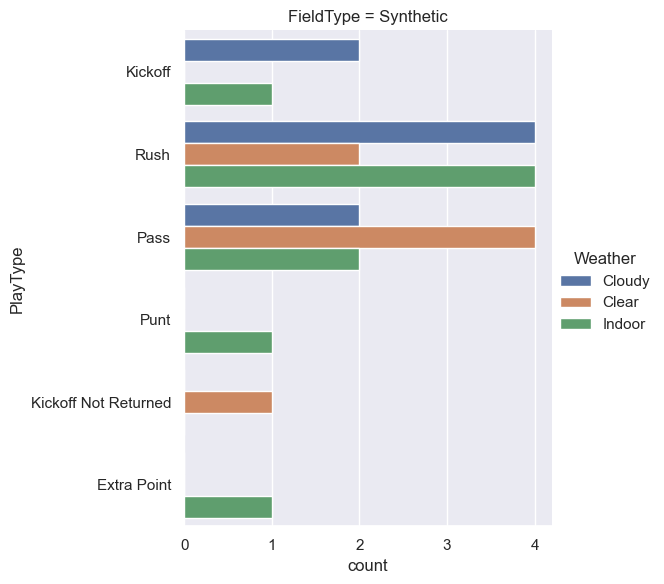

In [15]:
df_In_closed=df[df['StadiumType']=="Indoor_closed"]
sns.set(style='darkgrid')
sns.catplot(y="PlayType", hue="Weather", col="FieldType", data=df_In_closed, kind="count", height=6)

<AxesSubplot: xlabel='Temperature', ylabel='count'>

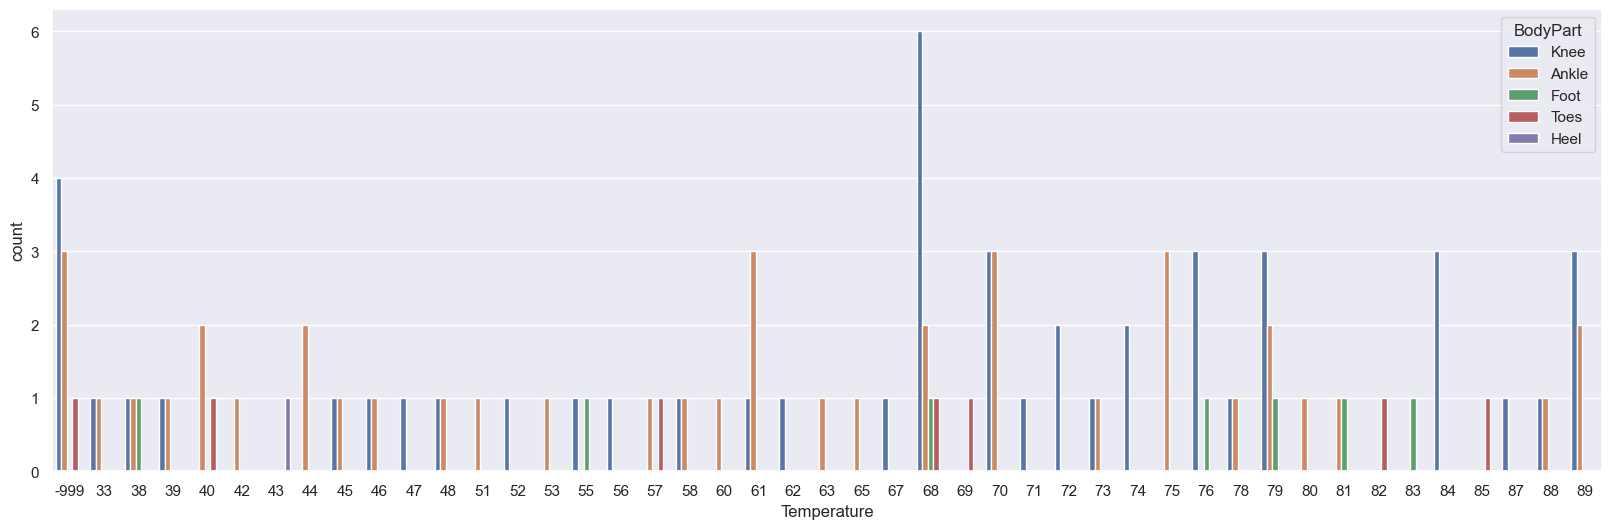

In [16]:
# BodyPart vs Tempratures Plot
plt.figure(figsize=(20, 6))
sns.countplot(data=df, x='Temperature', hue= 'BodyPart')

### Model Building
Here, transforming the features into numeric form for better performance of model

In [17]:
# Creating new feature Injury and  converting bodypart 'Knee','Foot','Ankle' as an injury = 1 and other as notInjury = 0.
df['Injury'] = df['BodyPart'].isin(['Knee', 'Foot', 'Ankle']).astype(int)

In [18]:
df['Injury'].value_counts()

1    96
0     8
Name: Injury, dtype: int64

In [19]:
# Selecting important features 
df_game = df[['StadiumType','FieldType','Weather', 'PlayType', 'Position', 'Temperature', 'Injury']]
df_game

,StadiumType,FieldType,Weather,PlayType,Position,Temperature,Injury
0,Indoor_closed,Synthetic,Cloudy,Kickoff,OLB,84,1
32,Indoor_open,Natural,Cloudy,Kickoff,OLB,76,1
58,Outdoor,Synthetic,Clear,Pass,SS,63,1
128,Outdoor,Natural,Cloudy,Kickoff,LB,80,1
158,Indoor_closed,Synthetic,Cloudy,Rush,WR,89,1
...,...,...,...,...,...,...,...
3292,Indoor_open,Synthetic,Clear,Rush,WR,73,1
3319,Indoor_closed,Synthetic,Cloudy,Pass,TE,84,1
3345,NaN,Natural,NaN,Rush,WR,68,1
3361,Outdoor,Natural,Clear,Kickoff Not Returned,OLB,56,1


Here, Spliting the dataset into input/independent feature and output/dependent labels data sets to the train the model

In [20]:
# Spliting the dataset into input/independent feature and output/dependent labels data sets.
features = ['StadiumType','FieldType','Weather', 'PlayType', 'Position', 'Temperature']
X = df_game[features]
y = df_game['Injury']

In [21]:
# One Hot Encode the multi-categorical features
X = pd.get_dummies(X, columns=['StadiumType','FieldType','Weather', 'PlayType', 'Position'],drop_first=True)

In [22]:
# Spliting the input and label features into 80% training and 20% testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15, random_state=42)

Here, Displaying the shape of training and testing datasets

In [23]:
# Display the shapes of training and testing sets 
print('Shape of Training Features:',X_train.shape)
print('Shape of Testing Features', X_test.shape)
print('Shape of Training Labels:',y_train.shape)
print('Shape of Testing Labels', y_test.shape)

Shape of Training Features: (88, 31)
Shape of Testing Features (16, 31)
Shape of Training Labels: (88,)
Shape of Testing Labels (16,)


Here, Initializing the Logestic Regression model and fitting on training sets

In [24]:
LR_Model = LogisticRegression(random_state=0)
# fitting the model to the train data (X_train and y_train)
LR_Model.fit(X_train, y_train)

c:\Users\abdik\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(random_state=0)

Here, predicting the values on testing data or unseen data

In [25]:
# Making predictions with the fit model based on the test data (X_test)
y_pred = LR_Model.predict(X_test)
# Checking the prediction
y_pred

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

In [26]:
# Here we find the accuracy of model 
print(f"Accuracy : {round(accuracy_score(y_test,y_pred),2)*100}%")

Accuracy : 94.0%


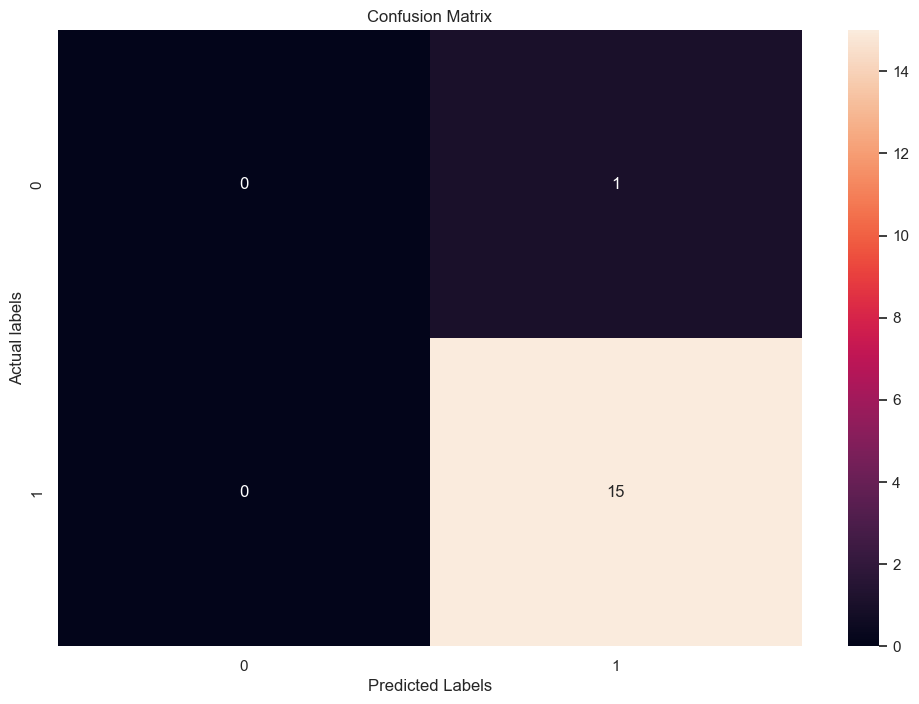

In [27]:
# Ploting the Confusion Matrix of Actual and Predicted Values
plt.figure(figsize=(12,8))
c_mat = confusion_matrix(y_test, y_pred)
sns.heatmap(c_mat, annot=True, fmt='g')

plt.xlabel('Predicted Labels')
plt.ylabel('Actual labels') 
plt.title('Confusion Matrix')
plt.show()

In [28]:
# Classification Report of Actual and Prediceted Values
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00         1
           1       0.94      1.00      0.97        15

    accuracy                           0.94        16
   macro avg       0.47      0.50      0.48        16
weighted avg       0.88      0.94      0.91        16



c:\Users\abdik\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\abdik\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\abdik\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average,

### Summary

Football injuries have a substantial impact on both team performance and finances, as millions of dollars are spent on player treatment and replacement. Consequently, numerous studies are being conducted to identify the primary risk factors that contribute to injuries. While knee and ankle injuries are the most common, fortunately, most of these injuries are not severe. However, injuries tend to occur more frequently on synthetic playing surfaces, which can affect player movement and positioning.
Our analysis shows that the most common type of injuries are ankle and knee injuries. The analysis also found that running backs and wide receivers were the most commonly injured positions, and temperature have a significant impact on injuries. Furthermore, we have found that offensive and defensive linemen are among the safest positions on the team.


The overall accuracy of the model is 0.94, which means that the model correctly classified 94% of the samples in the test dataset.

The macro average of precision, recall, and F1-score is calculated by averaging the scores for both classes, which are both very low at 0.47 and 0.50 respectively. This indicates that the model is performing poorly in classifying the minority class (class 0).

The weighted average of precision, recall, and F1-score takes into account the class imbalance by weighting the scores by the number of samples in each class. The weighted average shows that the model performs well overall with a weighted F1-score of 0.91. However, the poor performance on the minority class may be a concern, depending on the problem and the specific goals of the model.